In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
sns.set_style('whitegrid')

In [2]:
df=pd.read_csv('/content/Laliga.csv')
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition
1,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,33,23,8,8,3,4,79,1929,1929,1
2,2,Barcelona,86,4262,2762,1581,573,608,5900,3114,25,25,12,12,4,6,83,1929,1929,1
3,3,Atletico Madrid,80,3442,2614,1241,598,775,4534,3309,10,8,16,9,7,6,56,1929,2002-03,1
4,4,Valencia,82,3386,2664,1187,616,861,4398,3469,6,6,10,11,10,7,50,1931-32,1987-88,1


In [3]:
rw= {i:j for i,j in zip(df.columns, df.iloc[0].values)}

In [4]:
df.rename(rw, axis=1, inplace=True)

In [5]:
df.drop(0, inplace= True)

In [6]:
df.set_index('Pos', inplace= True)

In [7]:
df.head()

,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition
Pos,,,,,,,,,,,,,,,,,,,
1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,33,23,8,8,3,4,79,1929,1929,1
2,Barcelona,86,4262,2762,1581,573,608,5900,3114,25,25,12,12,4,6,83,1929,1929,1
3,Atletico Madrid,80,3442,2614,1241,598,775,4534,3309,10,8,16,9,7,6,56,1929,2002-03,1
4,Valencia,82,3386,2664,1187,616,861,4398,3469,6,6,10,11,10,7,50,1931-32,1987-88,1
5,Athletic Bilbao,86,3368,2762,1209,633,920,4631,3700,8,7,10,5,8,10,49,1929,1929,1


In [9]:
df.shape

(61, 19)

In [12]:
for i in range(len(df['Since/LastApp'].values)):
  if '-' in df['Since/LastApp'].values[i]:
    df['Since/LastApp'].values[i] = '{}{}'.format(df['Since/LastApp'].values[i].split('-')[0][:2], df['Since/LastApp'].values[i].split('-')[1])

In [15]:

for i in df.columns[1:]:
  df[i] = df[i].astype(float)

In [11]:
for i in df.columns:
  df[i].replace({'-': np.nan}, inplace= True)

In [14]:
for i in range(len(df['Debut'].values)):
  if '-' in df['Debut'].values[i]:
    df['Debut'].values[i] = df['Debut'].values[i].split('-')[0]

In [16]:
df.dtypes

Team              object
Seasons          float64
Points           float64
GamesPlayed      float64
GamesWon         float64
GamesDrawn       float64
GamesLost        float64
GoalsFor         float64
GoalsAgainst     float64
Champion         float64
Runner-up        float64
Third            float64
Fourth           float64
Fifth            float64
Sixth            float64
T                float64
Debut            float64
Since/LastApp    float64
BestPosition     float64
dtype: object

##Q1  Prepare a short report to answer the following questions:
1.	Which are the teams which started playing between 1930-1980?
2.	Which are the top 5 teams in terms of points?
3.	What is the distribution of the winning percentage for all teams? Which teams are in the top 5 in terms of winning percentage? (Winning percentage= (GamesWon / GamesPlayed)*100)
4.	Is there a significant difference in the winning percentage for teams which have attained a best position between 1-3 and those teams which have had a best position between 4-7.


In [17]:
#Q1
#1
df.loc[(df['Debut']>=1930) & (df['Debut']<=1980)]['Team']

Pos
4                Valencia
6                 Sevilla
9                Zaragoza
10             Real Betis
11    Deportivo La Coruna
12             Celta Vigo
13             Valladolid
15         Sporting Gijon
16                Osasuna
17                 Malaga
18                 Oviedo
19               Mallorca
20             Las Palmas
22                Granada
23         Rayo Vallecano
24                  Elche
26               Hercules
27               Tenerife
28                 Murcia
29                 Alaves
30                Levante
31              Salamanca
32               Sabadell
33                  Cadiz
35              Castellon
38                Cordoba
40             Recreativo
41              Burgos CF
42             Pontevedra
47              Gimnastic
50               Alcoyano
51                   Jaen
53             AD Almeria
55                 Lleida
58                 Condal
59        Atletico Tetuan
60       Cultural Leonesa
Name: Team, dtype: object

In [23]:
#2
df['Team'].groupby(df['Points'].sort_values(ascending=False)).head(5)

Pos
1          Real Madrid
2            Barcelona
3      Atletico Madrid
4             Valencia
5      Athletic Bilbao
            ...       
57               Xerez
58              Condal
59     Atletico Tetuan
60    Cultural Leonesa
61              Girona
Name: Team, Length: 61, dtype: object

In [38]:
#3
df['winning_percent'] = [(df['GamesWon'].values[i]/df['GamesPlayed'].values[i])*100 for i in range(df.shape[0])]

In [37]:
del df['winning_percent']

In [39]:
df.head()

,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition,winning_percent
Pos,,,,,,,,,,,,,,,,,,,,
1,Real Madrid,86.0,4385.0,2762.0,1647.0,552.0,563.0,5947.0,3140.0,33.0,23.0,8.0,8.0,3.0,4.0,79.0,1929.0,1929.0,1.0,59.630702
2,Barcelona,86.0,4262.0,2762.0,1581.0,573.0,608.0,5900.0,3114.0,25.0,25.0,12.0,12.0,4.0,6.0,83.0,1929.0,1929.0,1.0,57.241130
3,Atletico Madrid,80.0,3442.0,2614.0,1241.0,598.0,775.0,4534.0,3309.0,10.0,8.0,16.0,9.0,7.0,6.0,56.0,1929.0,2003.0,1.0,47.475134
4,Valencia,82.0,3386.0,2664.0,1187.0,616.0,861.0,4398.0,3469.0,6.0,6.0,10.0,11.0,10.0,7.0,50.0,1931.0,1988.0,1.0,44.557057
5,Athletic Bilbao,86.0,3368.0,2762.0,1209.0,633.0,920.0,4631.0,3700.0,8.0,7.0,10.0,5.0,8.0,10.0,49.0,1929.0,1929.0,1.0,43.772629


In [43]:
#

df['Team'].groupby(df['winning_percent'].sort_values(ascending=False)).head(5)

Pos
1          Real Madrid
2            Barcelona
3      Atletico Madrid
4             Valencia
5      Athletic Bilbao
            ...       
57               Xerez
58              Condal
59     Atletico Tetuan
60    Cultural Leonesa
61              Girona
Name: Team, Length: 61, dtype: object

In [44]:
#4
one_3 = df.loc[(df['BestPosition']>=1) & (df['BestPosition']<=3)]['winning_percent'].values

In [45]:
four_7 = df.loc[(df['BestPosition']>=4) & (df['BestPosition']<=7)]['winning_percent'].values

In [46]:
from scipy.stats import shapiro

stats1,pvalue1 = shapiro(one_3)
print(stats1, pvalue1)

0.8252524733543396 0.0035329433158040047


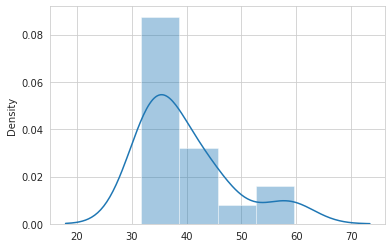

In [48]:
sns.set_style('whitegrid')
sns.distplot(one_3)

In [49]:
test_st, pv = stats.kruskal(one_3, four_7)

In [50]:
print(test_st, pv)

24.413782495561865 7.771074596666456e-07


In [51]:
stats2,pvalue2 = shapiro(four_7)
print(stats2, pvalue2)

0.9436671733856201 0.2809881269931793


H0: There is no significant difference between team with position between 1-3 and teams with positions 4-7

H1: there is significant difference 


Result:
there is significant difference in the winning percentage for teams which have attained a best position between 1-3 and those teams which have had a best position between 4-7

##A study was done to measure the blood pressure of 60 year old women with glaucoma. A random sample of 200 60-year old women with glaucoma was chosen. The mean of the systolic blood pressure in the sample was 140 mm Hg and the standard deviation was 25 mm Hg.

a)	Calculate the estimated standard error of the sample mean? What does the standard error indicate?

b)	Estimate a 95% confidence interval for the true mean blood pressure for all 60-year old women with glaucoma.

c)	Assume that instead of 200, a random sample of only 100 60-year old women with glaucoma was chosen. The sample mean and standard deviation estimates are the same as those in the original study. What is the estimated 95% confidence interval for the true mean blood pressure?

d)	Which of the two above intervals are wider?

e)	Explain in non-technical terms why the estimated standard error of a sample mean tends to decrease with an increase in sample size.


In [52]:
#Q2
n= 200
xbar = 140
std = 25

In [54]:
#a
se= std/np.sqrt(n)
print(se)

1.7677669529663687


In [55]:
#b
x1,y1= stats.t.interval(0.95,loc=xbar, df= n-1,scale=se)
print(x1,y1)

136.51404038839016 143.48595961160984


In [56]:
#c

x2,y2 = stats.t.interval(0.95,loc=xbar, df= 99,scale=se)
print(x2,y2)

136.49236684560728 143.50763315439272


In [57]:
#d
print(abs(x1-y1))
print(abs(x2-y2))

#100 sample is wider

6.971919223219686
7.015266308785442


when we divide the std with sqrt of sample size then bigger the denominator, smaller is the fraction

## Q3  One of the researchers voiced concern about the effect of the new coating on driving distances. Par would like the new cut-resistant ball to offer driving distances comparable to those of the current-model golf ball. To compare the driving distances for the two balls, 40 balls of both the new and current models were subjected to distance tests. The testing was performed with a mechanical hitting machine so that any difference between the mean distances for the two models could be attributed to a difference in the design. The results of the tests, with distances measured to the nearest yard, are contained in   the data set “Golf”.

1.	Formulate and present the rationale for a hypothesis test that Par could use to compare the driving distances of the current and new golf balls.

2.	Analyze the data to provide the hypothesis testing conclusion. What is the p-value for your test? What is your recommendation for Par Inc.?

3.	What is the 95% confidence interval for the population mean of each model, and 
what is the 95% confidence interval for the difference between the means of the two population?


In [59]:
df2=pd.read_csv('/content/Golf.csv')
df2.head()

,Current,New
0,264,277
1,261,269
2,267,263
3,272,266
4,258,262


H0:  No difference in mean GolfBallB-GolfBallA = 0

H1:  GolfBallB-GolfballA < 0

In [60]:
# paired one tail t test can be performed
# 1
c= df2['Current']
n= df2['New']


x1= np.mean(c)
std1= np.std(c)
se1= std1/np.sqrt(len(c))

x2= np.mean(n)
std2= np.std(n)
se2= std2/np.sqrt(len(c))

print(x1, 'c')
print(x2, 'n')

270.275 c
267.5 n


In [61]:

#performing normality test since not sure about the significant difference

print(stats.shapiro(c))
print(stats.shapiro(n))

(0.9707045555114746, 0.37878310680389404)
(0.9678265452384949, 0.3064688742160797)


In [63]:
#Using t-test as they are normal
#2
T_stats, pvalue = stats.ttest_rel(c, n)
print(T_stats, pvalue)

1.2769699827911767 0.20916361823147053


Since the pvalue > 0.05 we fail to reject null. So there is no difference between speeds.

In [69]:
#3 
print(stats.t.interval(0.95, loc=x1,df=len(c)-1, scale=se1))
print(stats.t.interval(0.95, loc=x2,df=len(c)-1, scale=se2))

(267.51087288314795, 273.039127116852)
(264.37463162538575, 270.62536837461425)


In [65]:
# difference of mean confidence interval

diff= x1 - x2
print(diff)

2.7749999999999773


In [67]:


n=len(c)
up= (se1**2)/n
lp= (se2**2)/n

print(up)
print(lp)

0.046687109375
0.059687500000000004


In [68]:
newsr= np.sqrt(up+lp)
newsr

0.3261512063062162

In [71]:
final = 1.96 * newsr
final

0.6392563643601837

95% confidence interval for estimating difference between means of two population is:

upper c_value = 2.774 + 0.6392

lower c_value = 2.774 - 0.6392